# 03. Filters
(work in progress)

In [1]:
%pylab inline
from IPython.display import Audio
style.use('seaborn') #more beautiful plots

Populating the interactive namespace from numpy and matplotlib


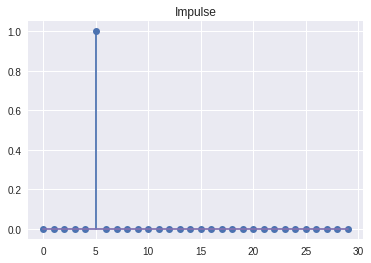

In [58]:
N = 30
impulse = zeros(N)
impulse[5] = 1
stem(impulse)
title('Impulse')
show()

Lets define a FIR simple lowpass:

$y(n)=x(n)+x(n-1)$

In [20]:
def simpleLowpass(x):
    #FIR lowpass
    y = zeros_like(x)
    for n in range(len(x)):
        y[n] = x[n]+x[n-1]
    return y

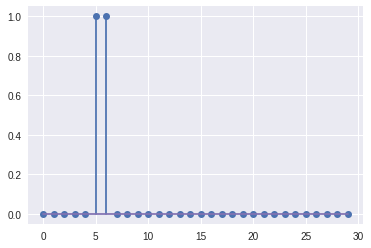

In [21]:
stem(simpleLowpass(impulse))
show()

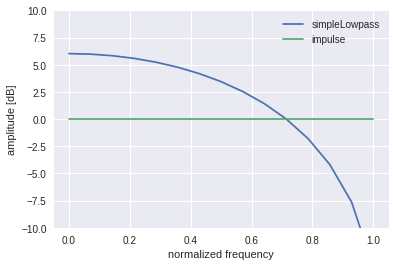

In [57]:
f = linspace(0,1,int(N/2))
plot(f, 20*log10(abs(fft.fft(simpleLowpass(impulse)))[0:int(N/2)]), label='simpleLowpass')
plot(f, 20*log10(abs(fft.fft(impulse))[0:int(N/2)]), label='impulse')
xlabel('normalized frequency')
ylabel('amplitude [dB]')
ylim([-10, 10])
legend()
show()

Lets define an IIR simple lowpass:

$y(n)=x(n)+y(n-1)$

In [22]:
def simpleLowpass2(x): 
    y = zeros_like(x)
    y1 = 0
    for n in range(len(x)):
        y[n] = x[n]+y1
        y1 = y[n]
    return y

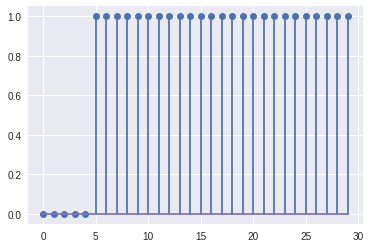

In [23]:
stem(simpleLowpass2(impulse))
show()

Notice how the ```simpleLowpass2()``` function essentially converts an impulse to a DC-signal. A DC-Signal is energy at 0Hz, so very low frequency. Changing our  ```simpleLowpass2()``` a bit lets us change its effect with a parameter $\alpha$:

$y(n)=x(n)+y(n-1) \cdot \alpha$

In [27]:
def simpleLowpass3(x,alpha):
    y = zeros_like(x)
    y1 = 0
    for n in range(len(x)):
        y[n] = x[n]+y1
        y1 = y[n]*alpha
    return y

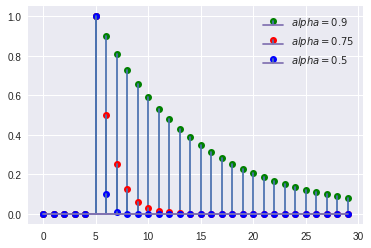

In [35]:
stem(simpleLowpass3(impulse, 0.9), markerfmt='go', label = '$ alpha =0.9$')
stem(simpleLowpass3(impulse, 0.5), markerfmt='ro', label = '$ alpha =0.75$')
stem(simpleLowpass3(impulse, 0.1), markerfmt='bo', label = '$ alpha =0.5$')
legend()
show()

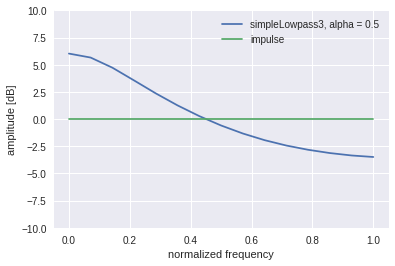

In [56]:
f = linspace(0,1,int(N/2))
plot(f, 20*log10( abs(fft.fft(simpleLowpass3(impulse, 0.5))+0.001)[0:int(N/2)]), label='simpleLowpass3, alpha = 0.5')
plot(f,  20*log10( abs(fft.fft(impulse))[0:int(N/2)]), label='impulse')
xlabel('normalized frequency')
ylabel('amplitude [dB]')
ylim([-10, 10])
legend()
show()